In [8]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from sklearn.decomposition import FastICA, PCA
from datetime import tzinfo, timedelta, datetime

import Indexes as idx
import technicalIndicators as ti

start_date = datetime(2010, 8, 3)
end_date = datetime(2015, 5, 24)



data =idx.Index('FB', start_date, end_date)
print(start_date)

df = pd.DataFrame()
df['Close'] = data.Close
df['Open'] = data.Open
df['High'] = data.High
df['Low'] = data.Low
df['Volume'] = data.Volume
df['avgExp'] = ti.ema(data.Close, 10)
df['%K'] = ti.STOK(data.Close, data.Low, data.High, 10)
df['ROC']=ti.ROC(data.Close,10)
df['RSI']=ti.RSI(data.Close)
df['AccDo']=ti.AccDO(data.Close,data.High,data.Low)
df['MACD']=ti.MACD(data.Close)
df['Williams_R']=ti.WilliamsR(data.Close,data.High,data.Low)
df['HIGH_PRICE_ACCELERATION']=ti.HPA(data.High,14)
df['DISPARITY_5']=ti.Disparity(data.Close,5)
df['DISPARITY_10']=ti.Disparity(data.Close,10)

print(df.isnull().sum().sum())
print (df.head())
df.fillna(0,inplace=True)
df.shape

2010-08-03 00:00:00
71
                Close       Open       High        Low     Volume     avgExp  \
Date                                                                           
2012-05-18  38.230000  42.049999  45.000000  38.000000  573576400  38.230000   
2012-05-21  34.029999  36.529999  36.660000  33.000000  168192700  37.466363   
2012-05-22  31.000000  32.610001  33.590000  30.940001  101786600  36.290661   
2012-05-23  32.000000  31.370001  32.500000  31.360001   73600000  35.510541   
2012-05-24  33.029999  32.950001  33.209999  31.770000   50237200  35.059533   

            %K  ROC  RSI     AccDo      MACD  Williams_R  \
Date                                                       
2012-05-18 NaN  NaN  NaN  0.000000  0.000000         NaN   
2012-05-21 NaN  NaN  NaN -0.428962 -0.335043         NaN   
2012-05-22 NaN  NaN  NaN -0.166037 -0.835432         NaN   
2012-05-23 NaN  NaN  NaN  1.315790 -1.138182         NaN   
2012-05-24 NaN  NaN  NaN  0.840278 -1.280243         NaN

(757, 15)

In [10]:
numberOfFeatures=3
X=df.iloc[:,0:numberOfFeatures].values
print("Value of X \n {0}".format(X))
print(X.shape)
X=np.multiply(X,1/X.std(axis=0))

Value of X 
 [[38.22999954 42.04999924 45.        ]
 [34.02999878 36.52999878 36.65999985]
 [31.         32.61000061 33.59000015]
 ...
 [80.55000305 80.47000122 81.09999847]
 [80.48000336 80.19000244 80.91999817]
 [80.54000092 80.34999847 81.30999756]]
(757, 3)


In [11]:
ica = FastICA(n_components=numberOfFeatures)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

In [12]:

# For comparison, compute PCA
pca = PCA(n_components=numberOfFeatures)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components



In [6]:
import pandas as pd
import numpy as np
x=np.array([[10,2],[5,4],[3,8]])
print("X before:{0}".format(x))
print(x.shape)
print(x.std(axis=0))
print("std deviation{0}".format(1/x.std(axis=0)))
x=np.multiply(x,1/x.std(axis=0))
print("X after:{0}".format(x))

X before:[[10  2]
 [ 5  4]
 [ 3  8]]
(3, 2)
[2.94392029 2.49443826]
std deviation[0.33968311 0.40089186]
X after:[[3.3968311  0.80178373]
 [1.69841555 1.60356745]
 [1.01904933 3.2071349 ]]


(757, 3) (757, 3) (757, 3)


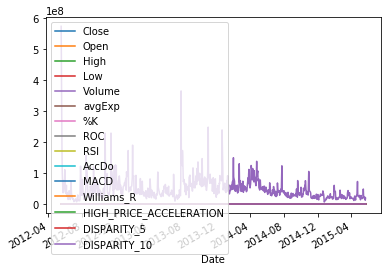

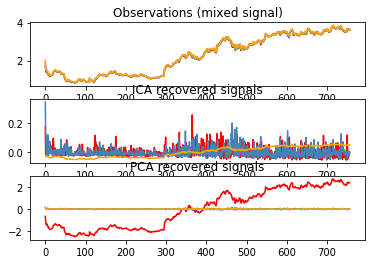

In [13]:
# #############################################################################
# Plot results
print(X.shape,S_.shape,H.shape)


df.plot()



models = [X, S_, H]
plt.figure()
names = ['Observations (mixed signal)',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(numberOfFeatures, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.show()
    

In [14]:
x=np.array([[10,2],[5,4],[3,8]])
print(x)
for columnIndex, color in enumerate(x):
    for j,item in enumerate(color):
        print (columnIndex * len(item) + j)

[[10  2]
 [ 5  4]
 [ 3  8]]


TypeError: object of type 'numpy.int32' has no len()

In [15]:
M=3
N=2
for i in range(M):
    for columnIndex in range(N):
        print(columnIndex*M+i)

0
3
1
4
2
5
